<a href="https://colab.research.google.com/github/PraveenPrabhat125/InternBix-Content/blob/main/IQR_Rule_for_Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

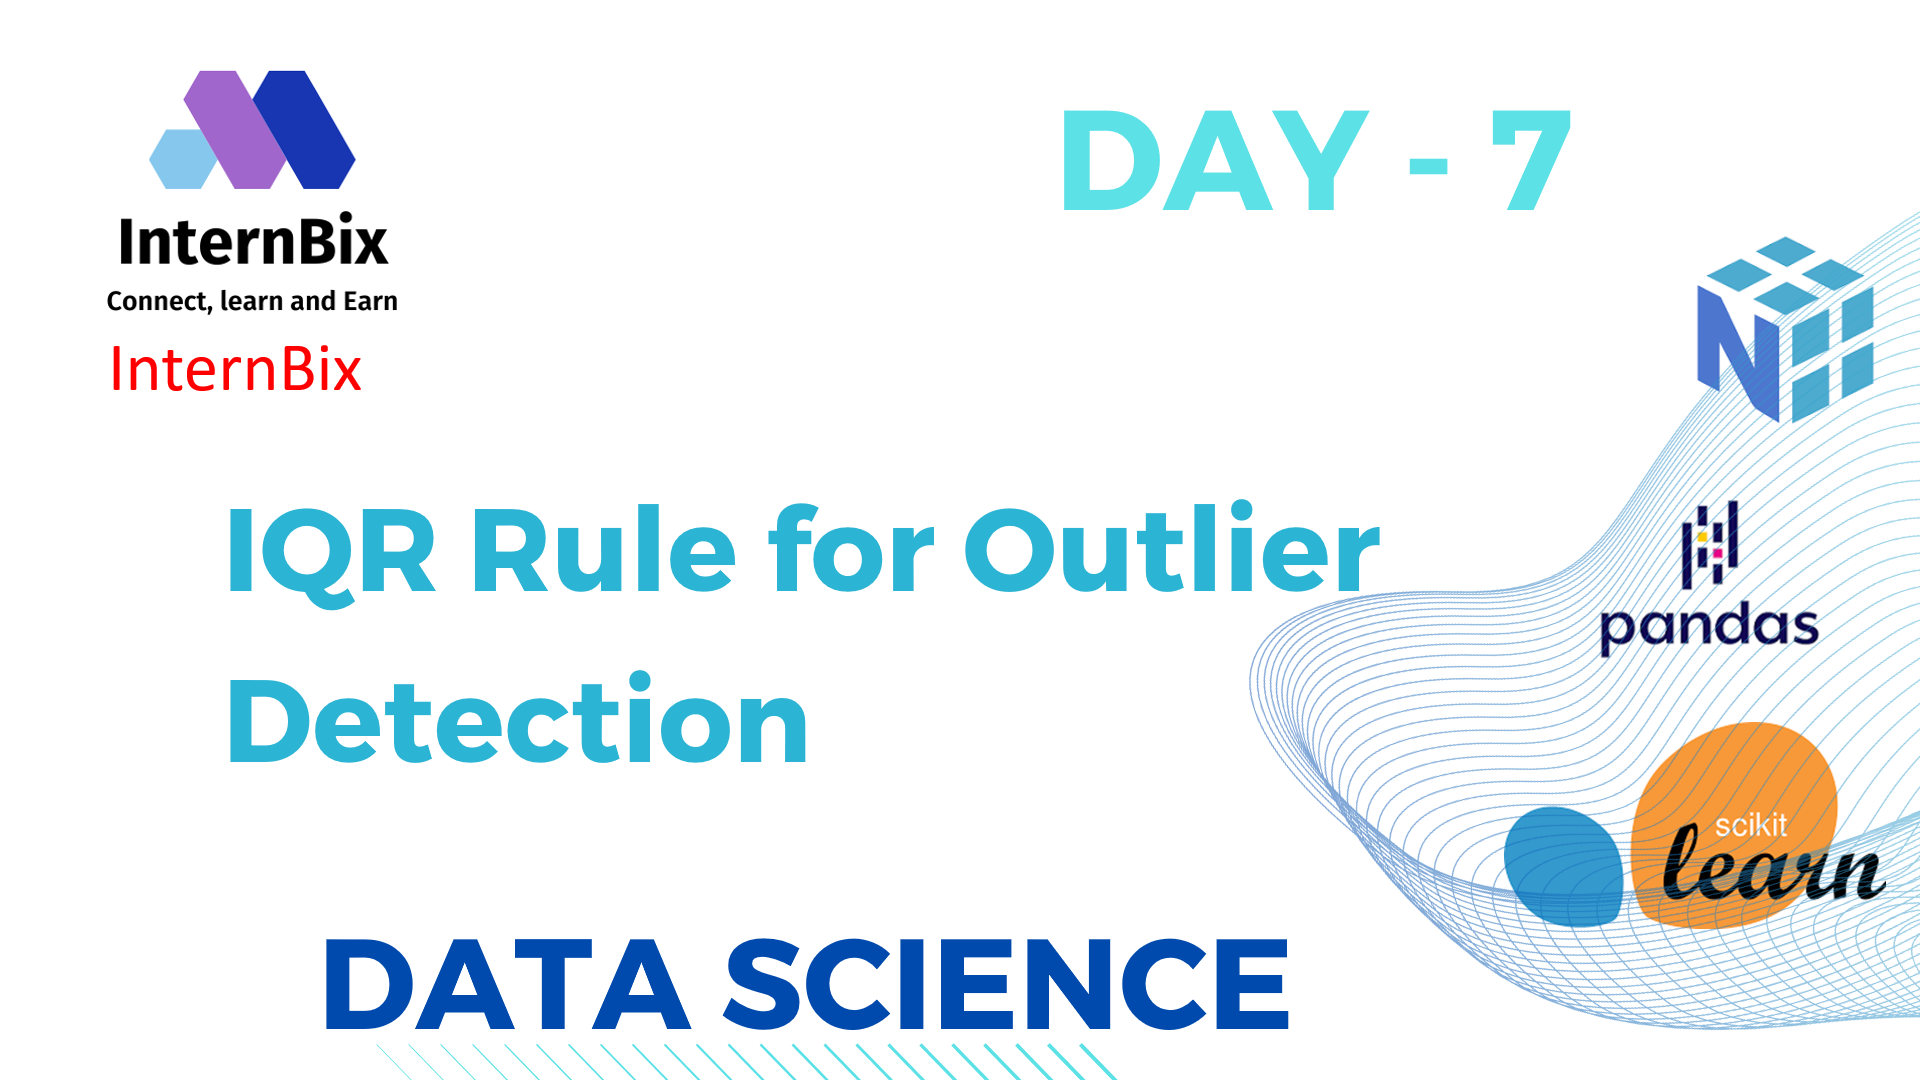

# Removing Outliers Using the Quartile Method in Data Science!

Outliers can significantly impact the performance of machine learning models. One effective method to identify and remove outliers is using quartiles. Let's explore how this works!

# What is the Quartile Method?

The quartile method uses the interquartile range (IQR) to identify outliers. Data points that fall below Q1 - 1.5IQR or above Q3 + 1.5IQR are considered outliers.

## Key Concept
1. Q1 (First Quartile): 25th percentile of the data.
2. Q3 (Third Quartile): 75th percentile of the data.
3. IQR (Interquartile Range): Q3 - Q1.

1. Introduction about the data
In this final assignment, I will use a dataset from a survey held by NHANES in 2015-2016. I collected the dataset from kaggle. I will conduct descriptive and diagnostic analysis with the aim to collect and compare data of BMI in different age group and gender.

- This dataset consists of 28 columns and 5735 rows. Among 28 columns, I isolated some columns which are related to my analysis.

## Brief explanation of the column :

SEQN = Respondent sequence number (
SMQ020 = Smoking
RIAGENDR = Gender
RIDAGEYR = Age (years)
DMDEDUC2 = Education level
BMXWT = Weight (kg)
BMXHT = Height (cm)
BMXBMI = BMI

# Import library and modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import data

In [3]:
path  = '/content/NHANES.csv'
data = pd.read_csv(path)
data.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


# Select the desired columns

In [14]:
data = data.loc[:, ('SEQN', 'SMQ020', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'BMXWT', 'BMXHT', 'BMXBMI') ]
data.head()

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


# Renaming of columns

In [18]:
data.columns = ['seqn', 'smoking', 'gender',
                'age', 'education', 'weight', 'height',  'bmi']
# data.rename(columns = {'one' :  'seqn', 'SMQ020': 'smoking'}, inplace= True)
# data

data.head()

,seqn,smoking,gender,age,education,weight,height,bmi
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


# Result
Dataset with 5735 rows and 8 columns. The dataset contain 3 categorical variables and 4 columns with numerical data.

1. Categorical = Smoking, gender, education
2. Numerical = age, weight, hight, bmi

# 3. Data cleaning
1. Check for duplicate or unnecessary data
2. check for null values or missing data
3. check outliers

In [20]:
data[data.duplicated()]

,seqn,smoking,gender,age,education,weight,height,bmi


- No Duplicates

In [21]:
data.head(2)

,seqn,smoking,gender,age,education,weight,height,bmi
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8


In [23]:
#lets droo the sqn col as it is not making much sense to data explainantion
data.drop('seqn',axis = 1, inplace = True)
data.head(2)

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8


# Check for null values

In [28]:
data.isnull().sum()

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64

# Result
1. Education, height, weight, and bmi have null values
2. As missing and null values count is less so, we can drop these row. I will drop them too because the number of missing values are very samll as compared to the dataset (> 5000 rows)

In [29]:
data.dropna(inplace = True)

In [30]:
data.shape

(5406, 7)

# Find outliers and handle outliers
I have three numerical data(weight, age, bmi), so i will try to find outliers from these columns using the histogram and boxplot

In [31]:
data.columns

Index(['smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi'], dtype='object')

In [32]:
numerical_cols = ['age', 'weight', 'height', 'bmi']
data[numerical_cols].describe()

,age,weight,height,bmi
count,5406.000000,5406.000000,5406.000000,5406.000000
mean,49.390122,81.715594,166.055679,29.541861
std,17.640915,21.775173,10.107149,7.076574
min,20.000000,32.400000,129.700000,14.500000
25%,34.000000,66.300000,158.600000,24.500000
50%,49.000000,78.500000,165.900000,28.500000
75%,64.000000,93.200000,173.400000,33.200000
max,80.000000,198.900000,202.700000,67.300000


<Axes: xlabel='bmi', ylabel='Count'>

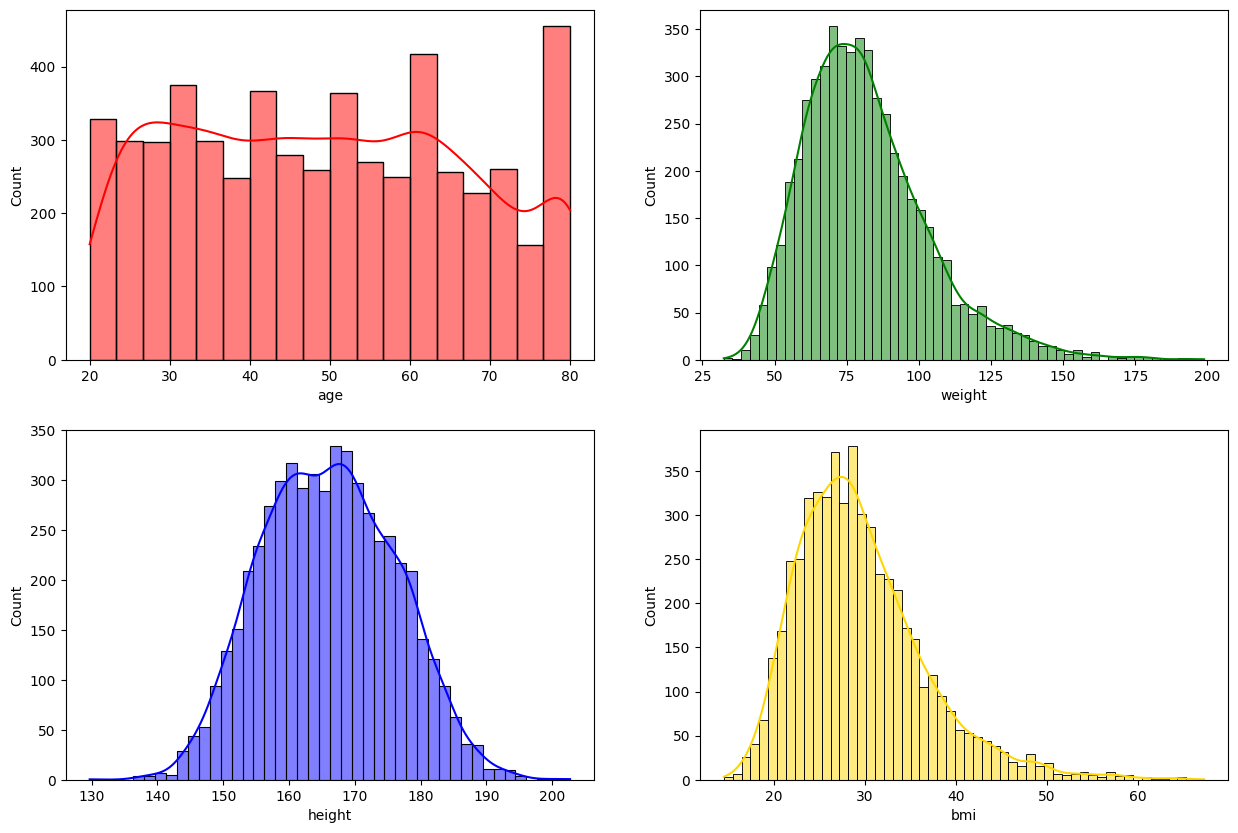

In [41]:
fig, axs = plt.subplots(2,2, figsize = (15,10))

sns.histplot(data = data, x = 'age', kde = True, color = 'r', ax = axs[0,0])

sns.histplot(data = data, x = 'weight', kde = True, color = 'g', ax = axs[0,1])


sns.histplot(data = data, x = 'height', kde = True, color = 'b', ax = axs[1,0])


sns.histplot(data = data, x = 'bmi', kde = True, color = 'gold', ax = axs[1,1])



#Result
Height has a normal distribution, where as weight and bmi is bit right skewed distribution.

image.png

<Axes: xlabel='bmi'>

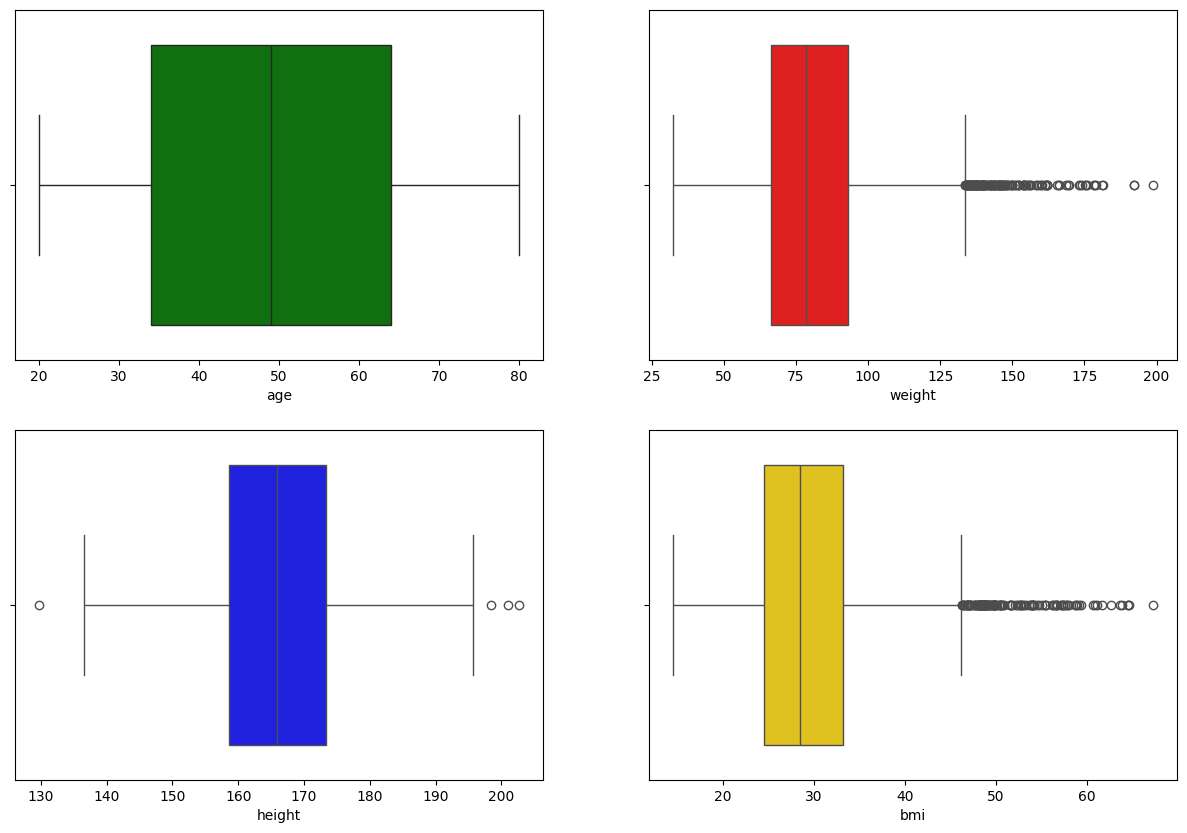

In [43]:
# boxplot to observed the distribution of numerical values

fig, axs = plt.subplots(2,2, figsize = (15,10))

sns.boxplot(data = data, x = 'age', ax = axs[0,0], color = 'g')


sns.boxplot(data = data, x = 'weight', ax = axs[0,1], color = 'r')


sns.boxplot(data = data, x = 'height', ax = axs[1,0], color = 'b')


sns.boxplot(data = data, x = 'bmi', ax = axs[1,1], color = 'gold')

# Result:
1. age has no outliers
2. weight, height, bmi have outliers above max value

# Observation
1. Height have outlier on both min and max values of height
2. bmi and weight have outliers more then max values.

# Note
1. Median (Q2/50th percentile): The middle value of the data set
2. First Quartile (Q1/25th percentile): The middle number between the smallest number (not the “minimum”) and the median of the data set
3. Third Quartile (Q3/75th percentile): The middle value between the median and the highest value (not the “maximum”) of the dataset
4. Interquartile Range (IQR): 25th to the 75th percentile Whiskers (shown in blue)
- Outliers (shown as green circles)
- “Minimum”: Q1 - 1.5*IQR
- “Maximum”: Q3 + 1.5*IQR

image.png

In [65]:
qh25, qh50, qh75 = np.percentile(data['height'], [25,50,75])
print(qh25, qh50, qh75)

# inter quantile range
iqrh = qh75 - qh25

# bounds
minh = qh25 - 1.45*iqrh
maxh = qh75 + 1.45*iqrh

data = data[(data['height']> minh) & (data['height']< maxh)]

158.5 165.7 172.9


# Why 1.5*i1rh ?
Empirical Basis:
- The 1.5 multiplier is derived from the properties of the normal distribution.

- For a normally distributed dataset, about 99.3% of the data points are expected to lie within the range of Q1 - 1.5IQR to Q3 + 1.5IQR.

- This means that only a small percentage of points (about 0.7%) will be considered outliers, which aligns well with typical expectations for outlier detection.

In [66]:
# weight
qh25, qh50, qh75 = np.percentile(data['weight'] , [25, 50 , 75])
print(qh25, qh50, qh75)

# maxh
iqrh = qh75 - qh25


maxh = qh75  + 1.3*iqrh


# choose the data of iqr only

data = data[(data['weight'] < maxh)]

65.4 77.0 89.5


In [67]:
# bmi
qh25, qh50, qh75 = np.percentile(data['bmi'], [25, 50, 75] )

iqrh = qh75-qh25

minh = qh25 - 1.5*iqrh

# choose all the data point > minh

data = data[(data['bmi'] > minh)]


maxh = qh75 + 1.45*iqrh
data = data[(data['bmi'] < maxh)]

<Axes: ylabel='bmi'>

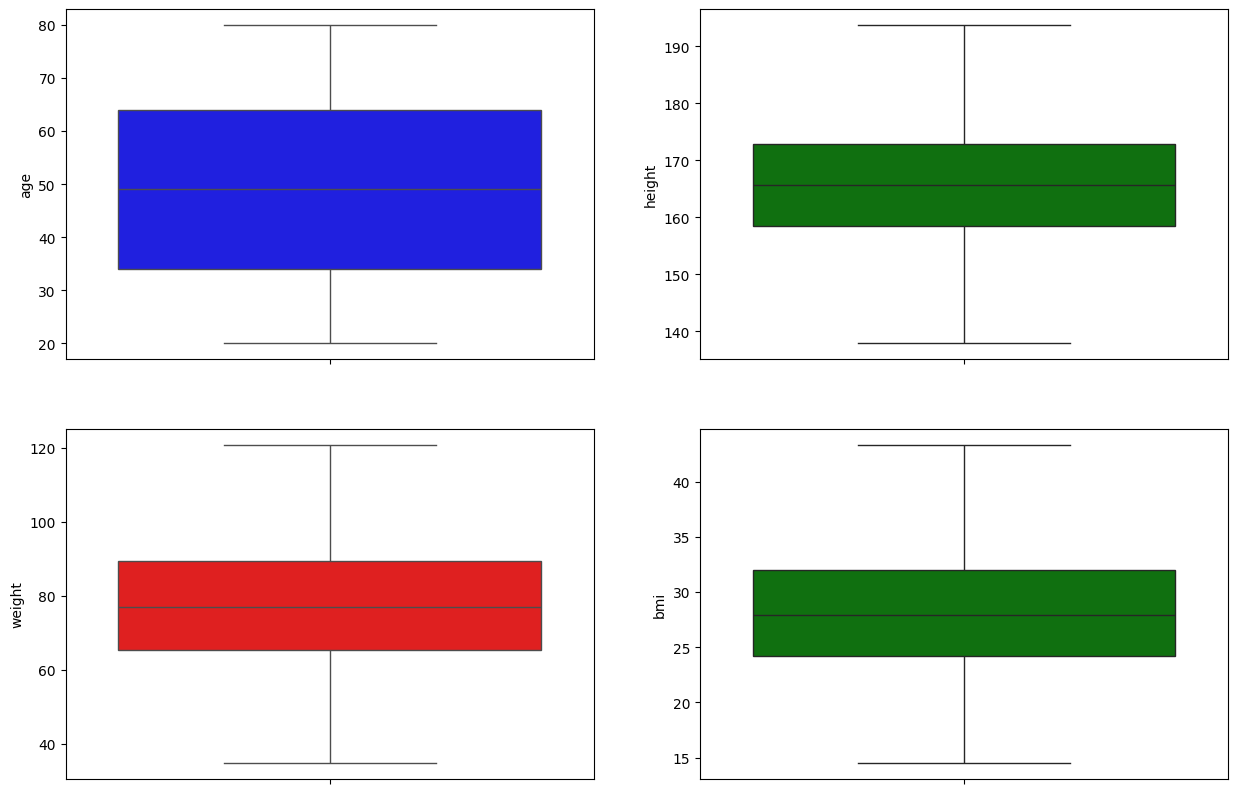

In [68]:

fig, axs  = plt.subplots(2,2, figsize = (15, 10))

sns.boxplot(data['age'], ax = axs[0,0], color = 'b')

sns.boxplot(data['height'], ax = axs[0,1], color = 'g')

sns.boxplot(data['weight'], ax = axs[1,0], color = 'r')

sns.boxplot(data['bmi'], ax = axs[1,1], color = 'g')

# Result
Numeriacl value is now free from outliers, the result data with normal distribution

<Axes: xlabel='bmi', ylabel='Count'>

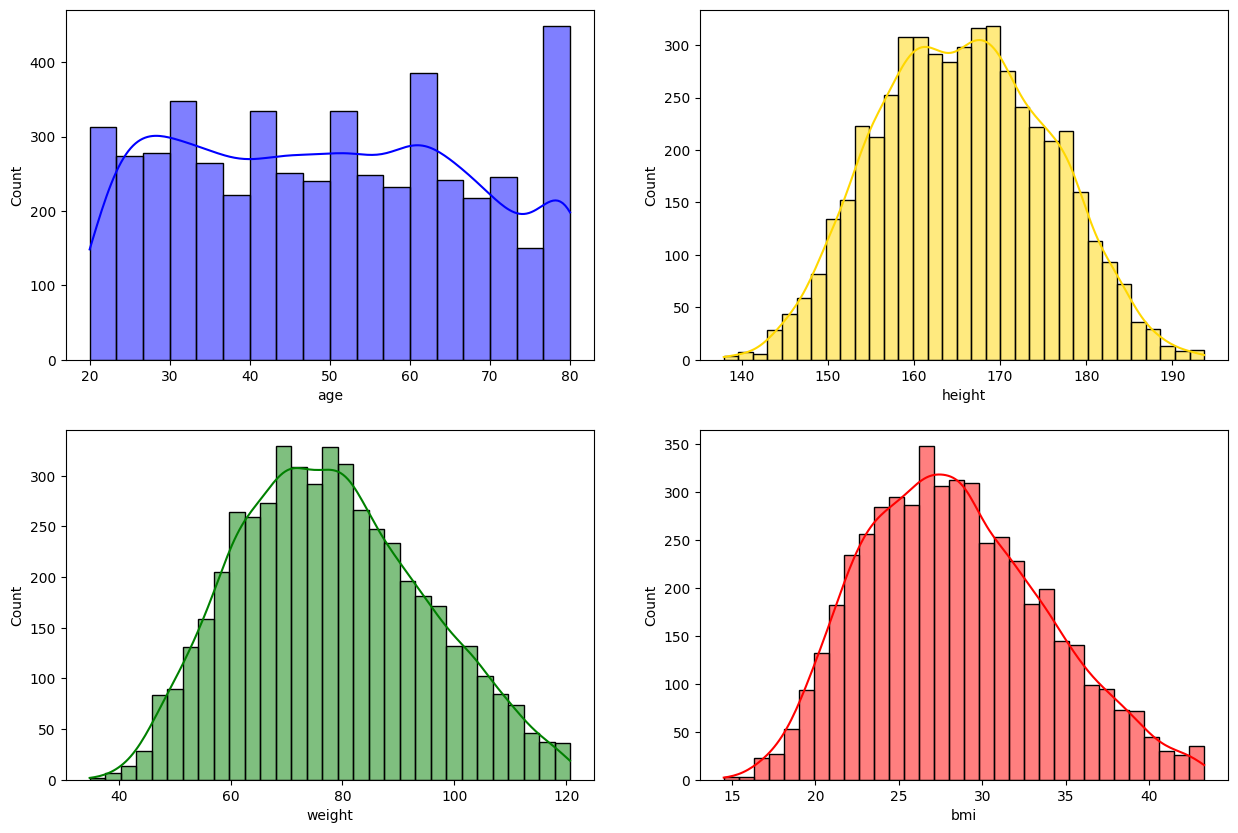

In [69]:
fig, axs = plt.subplots(2,2, figsize = (15,10))

sns.histplot(data = data, x = 'age', ax = axs[0,0], kde = True, color = 'b')

sns.histplot(data = data, x = 'height', ax = axs[0,1], kde = True, color = 'gold')

sns.histplot(data = data, x = 'weight', ax = axs[1,0], kde = True, color = 'g')

sns.histplot(data = data, x = 'bmi', ax = axs[1,1], kde = True, color = 'r')
